In [3]:
#Import_Libraries

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
#Verify_Dataset_(Sanity Check)

In [6]:
train_path = "D:/ml/flower/train"
test_path  = "D:/ml/flower/test"

print("TRAIN DATA")
for cls in os.listdir(train_path):
    print(cls, ":", len(os.listdir(os.path.join(train_path, cls))))

print("\nTEST DATA")
for cls in os.listdir(test_path):
    print(cls, ":", len(os.listdir(os.path.join(test_path, cls))))

TRAIN DATA
lily : 20
rose : 20
sunflower : 20
tulip : 20

TEST DATA
lily : 5
rose : 5
sunflower : 5
tulip : 5


In [7]:
#Load_Dataset

In [8]:
img_size = (128, 128)
batch_size = 16

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = train_data.class_names
print("Classes:", class_names)

Found 80 files belonging to 4 classes.
Found 20 files belonging to 4 classes.
Classes: ['lily', 'rose', 'sunflower', 'tulip']


In [9]:
#Normalize_Images

In [10]:
normalization_layer = layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data  = test_data.map(lambda x, y: (normalization_layer(x), y))

In [11]:
#Build_CNN_Model

In [12]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [13]:
#Compile_Model

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Train_Model

In [16]:
epochs = 10

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.3451 - loss: 1.8563 - val_accuracy: 0.2500 - val_loss: 1.3810
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.2957 - loss: 1.3663 - val_accuracy: 0.4000 - val_loss: 1.2906
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5571 - loss: 1.2250 - val_accuracy: 0.4000 - val_loss: 1.2073
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6255 - loss: 1.0131 - val_accuracy: 0.4500 - val_loss: 1.0760
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.6774 - loss: 0.8453 - val_accuracy: 0.6000 - val_loss: 1.0436
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.7997 - loss: 0.6502 - val_accuracy: 0.5000 - val_loss: 1.0287
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.7818 - loss: 0.5347 - val_accuracy: 0.3500 - val_loss: 1.5780
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8061 - loss: 0.4888 - val_accuracy: 0.5500 - val_loss:

In [17]:
#Plot_Accuracy&Loss

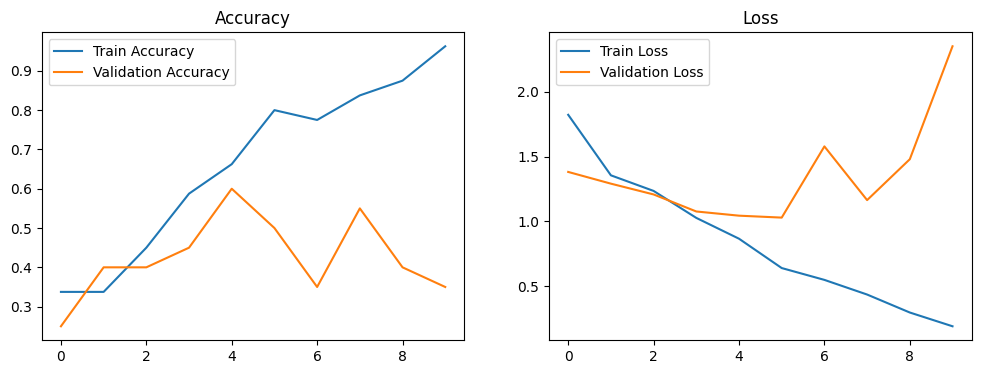

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [19]:
#Test_with_One_Image

In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "D:/ml/flower/check/test2.jpg"   # change to an actual file name

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Predicted Flower:", class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Flower: lily


In [35]:
#Save_Model

In [36]:
model.save("flower_classifier_model.keras")

In [37]:
from tensorflow import keras

model = keras.models.load_model(
    "C:/Users/Asus/Suraj ML/flower_classifier_model.keras"
)

print("Model loaded successfully")

Model loaded successfully


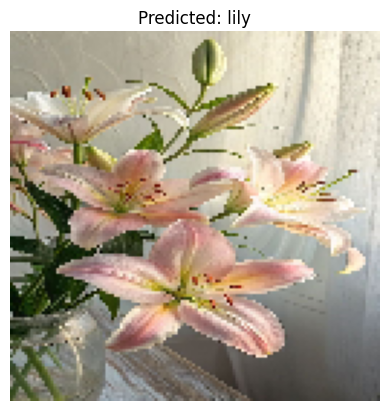

In [38]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {class_names[np.argmax(prediction)]}")
plt.axis("off")
plt.show()